Adam Peetz, Regis Jesuit University 2023

# Ad Hoc Prediction with Pretrained Models

A pipeline can be created to take a raw image and feed it into a pretrained model for prediction. Images are loaded, resized, and rescaled to match the input requirements for the model. They are then run through the model for creation of a prediction.

In [ ]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from tensorflow import keras
from google.colab import drive 
np.random.seed(42)

# Load Input Image and Display

Mounted at /content/gdrive


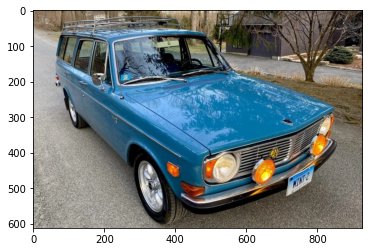

In [ ]:
#load input image

#step 1, mount google drive (will require permission to login to your google account)
drive.mount('/content/gdrive')

#step 2, specify the base directory where image is located.
target_image = cv2.imread('/content/gdrive/My Drive/cars_tanks/cherry_pick/volvo.jpg')

#step 3, test connection - show image with matplot lib
plt.imshow(target_image[:,:,::-1])
plt.show()

# Resize and Scale 

 
 

The dimensions of the image are used to direct the resizing operation. Images are resized to 224 pixels based on the shortest side of the image. The center 224x224 pixels are then cropped from the image to make a square. After the images are resized, the numerical values of the image tensor are divided by 255 to center the values. The effects of this transformation are shown below the preprocessing cell. 

Image Width is 224
Image Height is 224


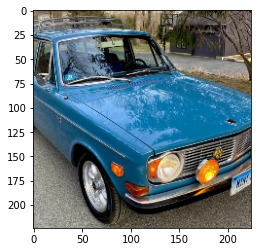

In [ ]:
# preprocess image for prediction

# get image width
image_width = target_image.shape[1]

# get image height
image_height = target_image.shape[0]
    
# if image width is greater than or equal to height
if image_width >= image_height:
    # calculate ratio to scale unfixed side
    x_scale_ratio = int(image_width*(224/image_height))
    # resize image 
    width_defined_image = cv2.resize(target_image, (x_scale_ratio,224))
    # get dimensions for center crop
    width_dim_left = int((x_scale_ratio/2)-112)
    width_dim_right = int((x_scale_ratio/2)+112)
    # apply center crop
    processed_image = width_defined_image[:,width_dim_left:width_dim_right]
        
# if image height is greater than width
if image_width < image_height:
    # calculate ratio to scale unfixed side
    y_scale_ratio = int(image_height*(224/image_width))
    # resize image 
    height_defined_image = cv2.resize(target_image, (224,y_scale_ratio))
    # get dimensions for center crop
    height_dim_left = int((y_scale_ratio/2)-112)
    height_dim_right = int((y_scale_ratio/2)+112)
    # apply center crop
    processed_image = height_defined_image[height_dim_left:height_dim_right,]

# rescale tensor to values between 0-1
processed_image = processed_image / 255

# get image shape width
print('Image Width is',processed_image.shape[1])

# get image shape height
print('Image Height is',processed_image.shape[0])

# show transformed image
plt.imshow(processed_image[:,:,::-1])
plt.show()

# Generate a Prediction 

 
 

A pretrained model is then loaded to make the prediction. The image must be converted to a 4-dimensional tensor before it can be fed into the model. The newly created 4D tensor is shown to the model. The output of the model is a 1-dimensional tensor. This 1D tensor is converted to a NumPy array and the boolen prediction value is converted to a human readable prediction. 


In [ ]:
# generate a prediction

# import trained model from google drive location
xception_train = keras.models.load_model('/content/gdrive/My Drive/cars_tanks/exception_tanks_cars.h5')

# reshape tensor from 3D to 4D
image = processed_image.reshape(1, 224, 224, 3)

# generate predictions
y_prob = xception_train(image) 

# convert tensor to numpy array
prediction = y_prob.numpy()

# generate text classification with array indexing
if prediction[0][0] == 1:
  print('CAR')
if prediction[0][1] == 1:
  print('TANK')

CAR


# Prediction Discussion

The model generates a correct prediction for a volvo, identifying it as a car.